In [1]:
import torch
import torch.nn as nn

import cv2
from resnet_yolo import resnet50, resnet18
import torchvision.transforms as transforms
from dataset import yoloDataset
from predict import *

%matplotlib inline
from matplotlib import pyplot as plt

# from visualize import Visualizer
import numpy as np
import os


In [2]:

file_root = '/home/stefan/data/VOCdevkit/VOC2007/JPEGImages/'
project_path = os.getcwd()
learning_rate = 0.001
num_epochs = 50
batch_size = 24
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
net = resnet18()
print('load model...')
net.load_state_dict(torch.load('best_multi.pth', map_location='cpu'))
net = net.to(device)
net.eval()

load model...


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

### Data loading

In [4]:
train_dataset = yoloDataset(root=file_root,list_file=os.path.join(project_path, 'voc2007.txt'),train=False,transform = [transforms.ToTensor()] )


data init


predicting...


/home/stefan/programs/anaconda3/envs/ssd/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


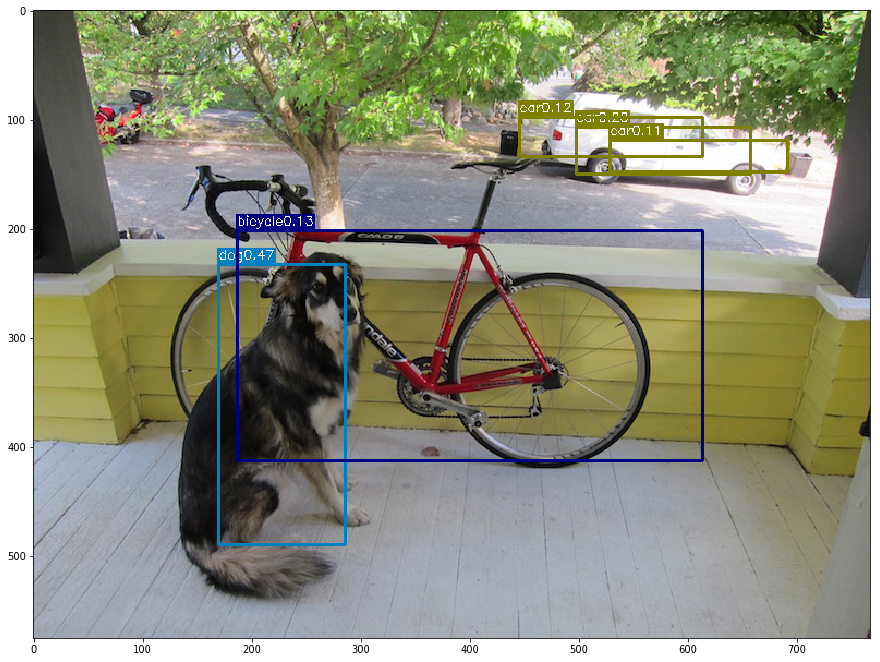

In [5]:
image_name = 'dog.jpg'
image = cv2.imread(image_name)
print('predicting...')
result = predict_img(net, image_name, device)
for left_up,right_bottom,class_name,_,prob in result:
    color = Color[VOC_CLASSES.index(class_name)]
    cv2.rectangle(image,left_up,right_bottom,color,2)
    label = class_name+str(round(prob,2))
    text_size, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
    p1 = (left_up[0], left_up[1]- text_size[1])
    cv2.rectangle(image, (p1[0] - 2//2, p1[1] - 2 - baseline), (p1[0] + text_size[0], p1[1] + text_size[1]), color, -1)
    cv2.putText(image, label, (p1[0], p1[1] + baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1, 8)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# View the sampled input image before transform
plt.figure(figsize=(15,15))
plt.imshow(rgb_image)
plt.show()

predicting...


/home/stefan/programs/anaconda3/envs/ssd/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


box[(154, 118), (333, 367)] -> bird


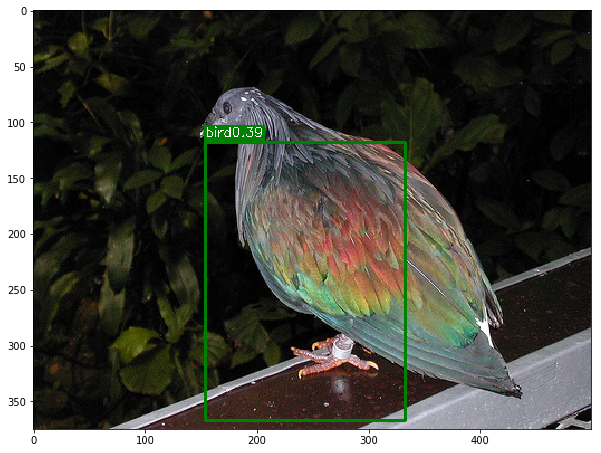

In [11]:
image_idx = 239

img, _ = train_dataset[image_idx]
image = train_dataset.pull_img(image_idx)


# image_name = 'person.jpg'
# image = cv2.imread(image_name)
print('predicting...')
result = predict(net, img, device)
for left_up,right_bottom,class_name,_,prob in result:
    color = Color[VOC_CLASSES.index(class_name)]
    cv2.rectangle(image,left_up,right_bottom,color,2)
    label = class_name+str(round(prob,2))
    text_size, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
    p1 = (left_up[0], left_up[1]- text_size[1])
    cv2.rectangle(image, (p1[0] - 2//2, p1[1] - 2 - baseline), (p1[0] + text_size[0], p1[1] + text_size[1]), color, -1)
    cv2.putText(image, label, (p1[0], p1[1] + baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1, 8)
    
    print("box[{}, {}] -> {}".format(left_up, right_bottom, class_name))
    
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# View the sampled input image before transform
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.show()